<a href="https://colab.research.google.com/github/sudeepbhagat11/ML-LAB-102217257/blob/main/ML_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q 1 (Based on Step-by-Step Implementation of Ridge Regression using Gradient
Descent Optimization)
Generate a dataset with atleast seven highly correlated columns and a target variable.
Implement Ridge Regression using Gradient Descent Optimization. Take different
values of learning rate (such as 0.0001,0.001,0.01,0.1,1,10) and regularization
parameter (10-15,10-10,10-5
,10- 3
,0,1,10,20). Choose the best parameters for which ridge
regression cost function is minimum and R2_score is maximum.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 1)
X = np.hstack([X + np.random.normal(0, 0.02, (n_samples, 1)) for _ in range(7)])
y = 3 * X[:, 0] + 2 * X[:, 1] - 5 * X[:, 2] + np.random.normal(0, 0.1, n_samples)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

def ridge_regression(X, y, learning_rate, regularization_param, n_iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for i in range(n_iterations):
        y_pred = np.dot(X, weights) + bias
        residuals = y_pred - y

        weights_gradient = (2 / n_samples) * (np.dot(X.T, residuals) + regularization_param * weights)
        bias_gradient = (2 / n_samples) * np.sum(residuals)

        weights -= learning_rate * weights_gradient
        bias -= learning_rate * bias_gradient

        # Check for NaN values in weights or bias
        if np.isnan(weights).any() or np.isnan(bias):

            break

    return weights, bias

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
regularization_params = [1e-15, 1e-10, 1e-5, 1e-3, 1, 10, 20]

best_r2 = -np.inf
best_params = None
best_model = None

for lr in learning_rates:
    for reg in regularization_params:
        try:
            weights, bias = ridge_regression(X, y, learning_rate=lr, regularization_param=reg)
            y_pred = np.dot(X, weights) + bias

            if np.isnan(y_pred).any():

                continue

            r2 = r2_score(y, y_pred)

            if r2 > best_r2:
                best_r2 = r2
                best_params = (lr, reg)
                best_model = (weights, bias)
        except Exception as e:
            print(f"Error for lr={lr}, reg={reg}: {e}")
            continue

if best_params:
    print(f"Best Learning Rate: {best_params[0]}")
    print(f"Best Regularization Parameter: {best_params[1]}")
    print(f"Best R2 Score: {best_r2}")
else:
    print("No valid parameters found.")

if best_model:
    weights, bias = best_model
    print("Best Weights:", weights)
    print("Best Bias:", bias)


Best Learning Rate: 0.1
Best Regularization Parameter: 1e-15
Best R2 Score: 0.5184322472390128
Best Weights: [ 0.56223849  0.33693059 -0.92515723 -0.02385099 -0.0019705   0.02367814
  0.03067171]
Best Bias: 0.012151280644337983


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Best R2 Score: -2.211554207720615
Best Parameters: Learning Rate=0.1, Regularization=1e-15


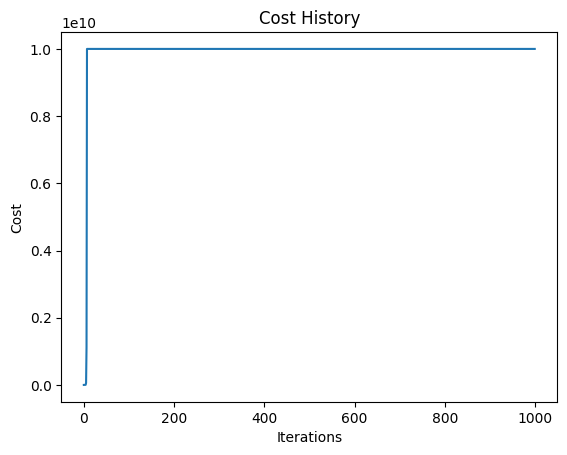

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 100
n_features = 7

X = np.random.rand(n_samples, n_features)
X[:, 1:] = X[:, 0].reshape(-1, 1) + np.random.rand(n_samples, n_features - 1) * 0.1
y = 5 * X[:, 0] + 3 * X[:, 1] + np.random.randn(n_samples) * 0.1  # Target variable

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

def ridge_regression(X, y, lr, alpha, num_iterations):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    cost_history = []

    for i in range(num_iterations):
        y_pred = X.dot(theta)
        residuals = y_pred - y
        gradient = (2/n_samples) * X.T.dot(residuals) + 2 * alpha * theta

        gradient = np.clip(gradient, -1e10, 1e10)

        theta -= lr * gradient

        theta = np.clip(theta, -1e10, 1e10)

        cost = np.mean(residuals**2) + alpha * np.sum(theta**2)

        cost_history.append(np.clip(cost, -1e10, 1e10))

    return theta, cost_history

learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1]
regularization_params = [1e-15, 1e-10, 1e-5, 1e-3, 0, 1, 10, 20]

best_r2 = -float('inf')
best_params = None
best_model = None

for lr in learning_rates:
    for alpha in regularization_params:
        theta, cost_history = ridge_regression(X, y, lr, alpha, 1000)
        y_pred = X.dot(theta)
        r2 = r2_score(y, y_pred)
        if r2 > best_r2:
            best_r2 = r2
            best_params = (lr, alpha)
            best_model = theta

print(f"Best R2 Score: {best_r2}")
print(f"Best Parameters: Learning Rate={best_params[0]}, Regularization={best_params[1]}")

plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()


Q 2 Load the Hitters dataset from the following link
https://drive.google.com/file/d/1qzCKF6JKKMB0p7ul_lLy8tdmRk3vE_bG/view?usp=sharing

(a) Pre-process the data (null values, noise, categorical to numerical encoding)

(b) Separate input and output features and perform scaling

(c) Fit a Linear, Ridge (use regularization parameter as 0.5748), and LASSO (use
regularization parameter as 0.5748) regression function on the dataset.

(d) Evaluate the performance of each trained model on test set. Which model performs
the best and Why?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


hitters = pd.read_csv('/content/Hitters.csv')

hitters = hitters.dropna()
le = LabelEncoder()
hitters['League'] = le.fit_transform(hitters['League'])
hitters['Division'] = le.fit_transform(hitters['Division'])
hitters['NewLeague'] = le.fit_transform(hitters['NewLeague'])

X = hitters.drop('Salary', axis=1)
y = hitters['Salary']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
ridge_model = Ridge(alpha=0.5748)
lasso_model = Lasso(alpha=0.5748)

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

models = {'Linear Regression': linear_model, 'Ridge Regression': ridge_model, 'Lasso Regression': lasso_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE={mse:.2f}, R2={r2:.2f}")



Linear Regression: MSE=128284.35, R2=0.29
Ridge Regression: MSE=126648.59, R2=0.30
Lasso Regression: MSE=126779.46, R2=0.30


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+04, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


Q 3 Cross Validation for Ridge and Lasso Regression
Explore Ridge Cross Validation (RidgeCV) and Lasso Cross Validation (LassoCV)
function of Python. Implement both on Boston House Prediction Dataset (load_boston
dataset from sklearn.datasets).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

file_path = '/content/Boston_Housing.csv'
boston = pd.read_csv(file_path)

print("Dataset Shape:", boston.shape)
print("Checking for missing values:\n", boston.isnull().sum())

X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ridge_alphas = np.logspace(-6, 6, 13)
lasso_alphas = np.logspace(-6, 6, 13)

ridge_cv_model = RidgeCV(alphas=ridge_alphas, cv=5).fit(X_train, y_train)
lasso_cv_model = LassoCV(alphas=lasso_alphas, cv=5, max_iter=10000).fit(X_train, y_train)

models = {'RidgeCV': ridge_cv_model, 'LassoCV': lasso_cv_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: Best Alpha={model.alpha_}, MSE={mse:.2f}, R²={r2:.2f}")




Dataset Shape: (506, 14)
Checking for missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
RidgeCV: Best Alpha=1.0, MSE=24.31, R²=0.67
LassoCV: Best Alpha=1e-06, MSE=24.29, R²=0.67
